Load all different CSV

In [65]:
import pandas as pd
import os

# Define the base directory for the CSV files
base_dir = "/Users/akshitmodi/Downloads/synthea_1m_fhir_3_0_May_24/output_1/csv"

# Load CSV files
patients = pd.read_csv(os.path.join(base_dir, "patients.csv"))
conditions = pd.read_csv(os.path.join(base_dir, "conditions.csv"))
medications = pd.read_csv(os.path.join(base_dir, "medications.csv"))
procedures = pd.read_csv(os.path.join(base_dir, "procedures.csv"))
encounters = pd.read_csv(os.path.join(base_dir, "encounters.csv"))
print(patients.columns)
print(conditions.columns)
print(medications.columns)
print(procedures.columns) 
print(encounters.columns)
print(patients.head)
# Rename "Id" column to "PATIENT" in patients.csv

Index(['PATIENT', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT',
       'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE',
       'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS'],
      dtype='object')
Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION'], dtype='object')
Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION',
       'REASONCODE', 'REASONDESCRIPTION'],
      dtype='object')
Index(['DATE', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION', 'REASONCODE',
       'REASONDESCRIPTION'],
      dtype='object')
Index(['ID', 'DATE', 'PATIENT', 'CODE', 'DESCRIPTION', 'REASONCODE',
       'REASONDESCRIPTION'],
      dtype='object')
<bound method NDFrame.head of                                      PATIENT BIRTHDATE DEATHDATE          SSN  \
0       660bec03-9e58-47f2-98b9-2f1c564f3838   7/26/96       NaN  999-70-3315   
1       5125d2b2-3aef-4ae2-aa5c-335f7e206b92   9/24/96       NaN  999-89-6289   
2       26626faf-cbd5-48d5-a3bf

In [115]:
print(len(patients))

132913


Remove all columns that start with "Unnamed:

In [68]:
patients = patients.loc[:, ~patients.columns.str.startswith("Unnamed:")]
patients.to_csv("/Users/akshitmodi/Downloads/synthea_1m_fhir_3_0_May_24/output_1/csv/patients.csv", index=False)



In [4]:
patients.head()

,PATIENT,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS
0,660bec03-9e58-47f2-98b9-2f1c564f3838,7/26/96,NaN,999-70-3315,S99945940,FALSE,Ms.,Geovany567,Reichert456,NaN,NaN,NaN,white,irish,F,Fitchburg MA US,20810 Bart Inlet Eastham MA 02642 US
1,5125d2b2-3aef-4ae2-aa5c-335f7e206b92,9/24/96,NaN,999-89-6289,S99991246,FALSE,Ms.,Tianna156,Kuphal267,NaN,NaN,NaN,white,french_canadian,F,Westborough MA US,295 Walter Mill Dennis MA 02638 US
2,26626faf-cbd5-48d5-a3bf-a7b21ae08e4b,9/1/44,9/4/15,999-79-2204,S99913823,X19963891X,Mr.,Ryleigh341,Mraz432,NaN,NaN,M,white,irish,M,Fall River MA US,23401 Gerhold Fords Eastham MA 02642 US
3,f509a0f0-77ef-477f-977d-e2784a241b52,5/14/64,7/11/10,999-70-3377,S99930834,FALSE,Mrs.,Amparo640,Bergstrom813,NaN,Green619,M,white,french,F,Cambridge MA US,55368 Suzanne Viaduct Barnstable MA 02630 US
4,4c763cac-b1df-4bcc-b89c-834942c4d3d6,3/5/46,1/10/67,999-52-5432,S99989461,FALSE,Ms.,Demarco886,Osinski65,NaN,NaN,NaN,white,irish,F,Framingham MA US,63493 Madison Streets Suite 556 Eastham MA 026...


Merge data

In [69]:
import pandas as pd
import os

# Step 2: ⚡ Rename 'ID' to 'PATIENT' immediately for patients.csv
patients.rename(columns={"ID": "PATIENT"}, inplace=True)

# Step 3: ⚡ If SUBJECT exists in others, rename to PATIENT


# Step 4: ⚡ Now, after renaming, make PATIENT column string
for df in [patients, conditions, medications, procedures, encounters]:
    df["PATIENT"] = df["PATIENT"].astype(str)

# Step 5: Define merge helper
def merge_list_values(df, column_name, new_col_name):
    return df.groupby("PATIENT")[column_name].apply(lambda x: ", ".join(x.dropna().astype(str))).reset_index().rename(columns={column_name: new_col_name})

# Step 6: Merge different descriptions
conditions_merged = merge_list_values(conditions, "DESCRIPTION", "CONDITION_NOTES")
medications_merged = merge_list_values(medications, "DESCRIPTION", "MEDICATION_NOTES")
procedures_merged = merge_list_values(procedures, "DESCRIPTION", "PROCEDURE_NOTES")
encounters_merged = merge_list_values(encounters, "DESCRIPTION", "ENCOUNTER_NOTES")

# Step 7: Merge everything together
merged_data = patients \
    .merge(conditions_merged, on="PATIENT", how="inner") \
    .merge(medications_merged, on="PATIENT", how="inner") \
    .merge(procedures_merged, on="PATIENT", how="inner") \
    .merge(encounters_merged, on="PATIENT", how="inner")

# Step 8: Fill missing
merged_data.fillna("No Data", inplace=True)

# Step 9: Save
output_path = os.path.join(base_dir, "processed_patient_details01.csv")
merged_data.to_csv(output_path, index=False)
print(f"✅ Merged data saved at {output_path}")
print(len(merged_data))
# Step 10: Display some rows
import IPython.display as display
display.display(merged_data.head())

✅ Merged data saved at /Users/akshitmodi/Downloads/synthea_1m_fhir_3_0_May_24/output_1/csv/processed_patient_details01.csv
76861


,PATIENT,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CONDITION_NOTES,MEDICATION_NOTES,PROCEDURE_NOTES,ENCOUNTER_NOTES
0,660bec03-9e58-47f2-98b9-2f1c564f3838,7/26/96,No Data,999-70-3315,S99945940,FALSE,Ms.,Geovany567,Reichert456,No Data,...,No Data,white,irish,F,Fitchburg MA US,20810 Bart Inlet Eastham MA 02642 US,"Whiplash injury to neck, Acute bronchitis (dis...","Penicillin V Potassium 250 MG, Levora 0.15/30 ...","Documentation of current medications, Measurem...","Consultation for treatment, Outpatient Encount..."
1,5125d2b2-3aef-4ae2-aa5c-335f7e206b92,9/24/96,No Data,999-89-6289,S99991246,FALSE,Ms.,Tianna156,Kuphal267,No Data,...,No Data,white,french_canadian,F,Westborough MA US,295 Walter Mill Dennis MA 02638 US,Perennial allergic rhinitis with seasonal vari...,"Fexofenadine hydrochloride 30 MG Oral Tablet, ...","Subcutaneous immunotherapy, Subcutaneous immun...","Outpatient procedure, Encounter for problem, O..."
2,26626faf-cbd5-48d5-a3bf-a7b21ae08e4b,9/1/44,9/4/15,999-79-2204,S99913823,X19963891X,Mr.,Ryleigh341,Mraz432,No Data,...,M,white,irish,M,Fall River MA US,23401 Gerhold Fords Eastham MA 02642 US,"Brain damage - traumatic, Hypertension, Acute ...","Penicillin V Potassium 500 MG, Penicillin V Po...","Documentation of current medications, Bone imm...","Outpatient Encounter, Encounter for symptom, O..."
3,f509a0f0-77ef-477f-977d-e2784a241b52,5/14/64,7/11/10,999-70-3377,S99930834,FALSE,Mrs.,Amparo640,Bergstrom813,No Data,...,M,white,french,F,Cambridge MA US,55368 Suzanne Viaduct Barnstable MA 02630 US,"Suspected lung cancer (situation), Non-small c...","Levonorgestrel 0.00354 MG/HR [Norplant], 24 HR...",Combined chemotherapy and radiation therapy (p...,"Death Certification, Encounter for problem"
4,6e9f8b3e-5a21-401e-868d-2d62e0e7f452,11/3/79,No Data,999-93-5171,S99927177,X29737332X,Mrs.,Dovie975,Ritchie555,No Data,...,M,white,irish,F,Wilmington MA US,603 Mathilde Skyway Barnstable MA 02630 US,"Chronic sinusitis (disorder), Normal pregnancy...","Chlorpheniramine 2 MG Chewable Tablet, Mirena ...","Insertion of subcutaneous contraceptive, Repla...","Prenatal visit, Prenatal visit, Consultation f..."


In [70]:
import pandas as pd
import os

# Load all CSVs
base_dir = "/Users/akshitmodi/Downloads/synthea_1m_fhir_3_0_May_24/output_1/csv"
patients = pd.read_csv(os.path.join(base_dir, "patients.csv"))
conditions = pd.read_csv(os.path.join(base_dir, "conditions.csv"))
medications = pd.read_csv(os.path.join(base_dir, "medications.csv"))
procedures = pd.read_csv(os.path.join(base_dir, "procedures.csv"))
encounters = pd.read_csv(os.path.join(base_dir, "encounters.csv"))
allergies = pd.read_csv(os.path.join(base_dir, "allergies.csv"))  
personal_data = pd.read_csv(os.path.join(base_dir, "personal_data.csv"))  
patients_add_data = pd.read_csv(os.path.join(base_dir, "patients_add_data.csv"))  # ✅ new


# Rename 'ID' to 'PATIENT' in patients
patients.rename(columns={"ID": "PATIENT"}, inplace=True)

# Convert PATIENT to string in all DataFrames
for df in [patients, conditions, medications, procedures, encounters, allergies]:
    df["PATIENT"] = df["PATIENT"].astype(str)

# Helper function to merge notes
def merge_list_values(df, column_name, new_col_name):
    return df.groupby("PATIENT")[column_name].apply(lambda x: ", ".join(x.dropna().astype(str))).reset_index().rename(columns={column_name: new_col_name})

# Merge summaries
conditions_merged = merge_list_values(conditions, "DESCRIPTION", "CONDITION_NOTES")
medications_merged = merge_list_values(medications, "DESCRIPTION", "MEDICATION_NOTES")
procedures_merged = merge_list_values(procedures, "DESCRIPTION", "PROCEDURE_NOTES")
encounters_merged = merge_list_values(encounters, "DESCRIPTION", "ENCOUNTER_NOTES")
allergies_merged = merge_list_values(allergies, "DESCRIPTION", "ALLERGY_NOTES")  
# Final merge — using INNER JOIN to keep only common PATIENTs
merged_data = patients \
    .merge(conditions_merged, on="PATIENT", how="inner") \
    .merge(medications_merged, on="PATIENT", how="inner") \
    .merge(procedures_merged, on="PATIENT", how="inner") \
    .merge(encounters_merged, on="PATIENT", how="inner") \
    .merge(allergies_merged, on="PATIENT", how="inner")  \
    .merge(personal_data, on="PATIENT", how="inner") \
    .merge(patients_add_data, on="PATIENT", how="inner")

# Fill missing (should be minimal due to inner joins)
merged_data.fillna("No Data", inplace=True)

# Save merged data
output_path = os.path.join(base_dir, "Patient_FULL_Details.csv")
merged_data.to_csv(output_path, index=False)
print(f"✅ Final merged data saved at: {output_path}")
print(len(merged_data))
# Preview a few rows
import IPython.display as display
display.display(merged_data.head())


/var/folders/yl/mffrkh6s4yq6jjp_pqsxdp7r0000gn/T/ipykernel_71954/3466732540.py:13: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  patients_add_data = pd.read_csv(os.path.join(base_dir, "patients_add_data.csv"))  # ✅ new


✅ Final merged data saved at: /Users/akshitmodi/Downloads/synthea_1m_fhir_3_0_May_24/output_1/csv/Patient_FULL_Details.csv
10136


,PATIENT,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,CONDITION_NOTES,MEDICATION_NOTES,PROCEDURE_NOTES,ENCOUNTER_NOTES,ALLERGY_NOTES,Height_cm,Weight_kg,BP_CITY,STATE,ZIP
0,5125d2b2-3aef-4ae2-aa5c-335f7e206b92,9/24/96,No Data,999-89-6289,S99991246,FALSE,Ms.,Tianna156,Kuphal267,No Data,...,Perennial allergic rhinitis with seasonal vari...,"Fexofenadine hydrochloride 30 MG Oral Tablet, ...","Subcutaneous immunotherapy, Subcutaneous immun...","Outpatient procedure, Encounter for problem, O...","Allergy to eggs, Allergy to tree pollen, Aller...",155.77,47.93,Westborough,MA,02638
1,6e9f8b3e-5a21-401e-868d-2d62e0e7f452,11/3/79,No Data,999-93-5171,S99927177,X29737332X,Mrs.,Dovie975,Ritchie555,No Data,...,"Chronic sinusitis (disorder), Normal pregnancy...","Chlorpheniramine 2 MG Chewable Tablet, Mirena ...","Insertion of subcutaneous contraceptive, Repla...","Prenatal visit, Prenatal visit, Consultation f...",Shellfish allergy,164.37,78.57,Wilmington,MA,02630
2,d8de9d90-3a96-4ee5-a750-d406ee10e18a,11/4/06,No Data,999-57-1911,No Data,No Data,No Data,Brandi317,Anderson350,No Data,...,"Concussion with no loss of consciousness, Chil...","cetirizine hydrochloride 5 MG Oral Tablet, 0.3...","Asthma screening, Documentation of current med...","Encounter for problem, Emergency room admissio...","Allergy to peanuts, Allergy to fish, Shellfish...",102.03,16.47,Weymouth Town,MA,02638
3,5c636b19-8730-4f6f-b178-5d67c03cb234,4/4/65,No Data,999-21-1789,S99999803,X81705377X,Ms.,Jarrell667,O'Kon648,No Data,...,"Hypertension, Acute allergic reaction, Acute v...","predniSONE 5 MG Oral Tablet, Acetaminophen 325...","Injection of adrenaline, Documentation of curr...","Emergency room admission, Encounter for proble...","Shellfish allergy, Allergy to mould",167.38,112.14,Attleboro,MA,02642
4,46a690fd-0e49-4e79-a7ea-aaa3d93de82d,8/2/10,No Data,999-71-4028,No Data,No Data,No Data,Devyn77,Weber322,No Data,...,"Viral sinusitis (disorder), Acute allergic rea...","predniSONE 5 MG Oral Tablet, Fexofenadine hydr...","Documentation of current medications, Document...","Outpatient Encounter, Outpatient Encounter, Ou...","Allergy to wheat, Allergy to dairy product, Al...",56.40,4.50,Medway,MA,02642


In [71]:
print(merged_data.columns)


Index(['PATIENT', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT',
       'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE',
       'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CONDITION_NOTES',
       'MEDICATION_NOTES', 'PROCEDURE_NOTES', 'ENCOUNTER_NOTES',
       'ALLERGY_NOTES', 'Height_cm', 'Weight_kg', 'BP_CITY', 'STATE', 'ZIP'],
      dtype='object')


In [72]:
print(merged_data.info())
unique = merged_data['PATIENT'].nunique()
print(unique)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10136 entries, 0 to 10135
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PATIENT           10136 non-null  object 
 1   BIRTHDATE         10136 non-null  object 
 2   DEATHDATE         10136 non-null  object 
 3   SSN               10136 non-null  object 
 4   DRIVERS           10136 non-null  object 
 5   PASSPORT          10136 non-null  object 
 6   PREFIX            10136 non-null  object 
 7   FIRST             10136 non-null  object 
 8   LAST              10136 non-null  object 
 9   SUFFIX            10136 non-null  object 
 10  MAIDEN            10136 non-null  object 
 11  MARITAL           10136 non-null  object 
 12  RACE              10136 non-null  object 
 13  ETHNICITY         10136 non-null  object 
 14  GENDER            10136 non-null  object 
 15  BIRTHPLACE        10136 non-null  object 
 16  ADDRESS           10136 non-null  object

In [85]:
# Unique patients
unique_patients = merged_data['PATIENT'].nunique()

# Total and unique procedure counts
total_procedures = merged_data['PROCEDURE_NOTES'].dropna().str.split(';').explode().str.strip().count()
unique_procedures = merged_data['PROCEDURE_NOTES'].dropna().str.split(';').explode().str.strip().nunique()

# Total and unique medication counts
total_medications = merged_data['MEDICATION_NOTES'].dropna().str.split(';').explode().str.strip().count()
unique_medications = merged_data['MEDICATION_NOTES'].dropna().str.split(';').explode().str.strip().nunique()

# Total encounter entries
total_encounters = merged_data['ENCOUNTER_NOTES'].dropna().str.split(';').explode().str.strip().count()

# Print results
print(f"Unique Patients: {unique_patients}")
print(f"Total Procedures: {total_procedures}")
print(f"Unique Procedures: {unique_procedures}")
print(f"Total Medications: {total_medications}")
print(f"Unique Medications: {unique_medications}")
print(f"Total Encounters: {total_encounters}")


Unique Patients: 10136
Total Procedures: 10136
Unique Procedures: 5713
Total Medications: 10136
Unique Medications: 6413
Total Encounters: 10136


In [88]:
import pandas as pd

# 🔁 Step 0: Convert BIRTHDATE and DEATHDATE to datetime
merged_data['BIRTHDATE'] = pd.to_datetime(merged_data['BIRTHDATE'], errors='coerce')
merged_data['DEATHDATE'] = pd.to_datetime(merged_data['DEATHDATE'], errors='coerce')

# ✅ Step 1: Find future birthdates
future_mask = merged_data['BIRTHDATE'] > pd.Timestamp.today()

# ✅ Step 2: Subtract 100 years from future birthdates
merged_data.loc[future_mask, 'BIRTHDATE'] = merged_data.loc[future_mask, 'BIRTHDATE'].apply(
    lambda d: d.replace(year=d.year - 100)
)

# ✅ Step 3: Recalculate AGE
today = pd.Timestamp.today()
merged_data['AGE'] = merged_data.apply(
    lambda row: ((row['DEATHDATE'] - row['BIRTHDATE']).days // 365)
    if pd.notnull(row['DEATHDATE']) and row['DEATHDATE'] > row['BIRTHDATE']
    else ((today - row['BIRTHDATE']).days // 365),
    axis=1
)

# ✅ Step 4: Check fix results
print("✅ Fixed future birthdates.")
print("Remaining rows with negative AGE:", merged_data[merged_data['AGE'] < 0].shape[0])


/var/folders/yl/mffrkh6s4yq6jjp_pqsxdp7r0000gn/T/ipykernel_71954/2376181685.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['BIRTHDATE'] = pd.to_datetime(merged_data['BIRTHDATE'], errors='coerce')
/var/folders/yl/mffrkh6s4yq6jjp_pqsxdp7r0000gn/T/ipykernel_71954/2376181685.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['DEATHDATE'] = pd.to_datetime(merged_data['DEATHDATE'], errors='coerce')


✅ Fixed future birthdates.
Remaining rows with negative AGE: 0


In [89]:
import pandas as pd

# Step 1: Find future birthdates
future_mask = merged_data['BIRTHDATE'] > pd.Timestamp.today()

# Step 2: Fix by subtracting 100 years from year
merged_data.loc[future_mask, 'BIRTHDATE'] = merged_data.loc[future_mask, 'BIRTHDATE'].apply(
    lambda d: d.replace(year=d.year - 100)
)

# Step 3: Recalculate AGE
today = pd.Timestamp.today()
merged_data['AGE'] = merged_data.apply(
    lambda row: ((row['DEATHDATE'] - row['BIRTHDATE']).days // 365)
    if pd.notnull(row['DEATHDATE']) and row['DEATHDATE'] > row['BIRTHDATE']
    else ((today - row['BIRTHDATE']).days // 365),
    axis=1
)

# Step 4: Check if fix worked
print("✅ Fixed future birthdates. Negative age count now:")
print(merged_data[merged_data['AGE'] < 0].shape[0])


✅ Fixed future birthdates. Negative age count now:
0


In [90]:
print(len(merged_data))
# 1. Filter rows with missing BIRTHDATE
missing_birthdate = merged_data[merged_data['BIRTHDATE'].isnull()]

# 2. Count them
num_missing = missing_birthdate.shape[0]

# 3. Print result
print(f"🔍 Number of rows with missing BIRTHDATE: {num_missing}")

# 4. Optionally display the first few rows
print("🧾 Sample rows with missing BIRTHDATE:")
print(missing_birthdate[['PATIENT', 'BIRTHDATE']].head())

10136
🔍 Number of rows with missing BIRTHDATE: 2
🧾 Sample rows with missing BIRTHDATE:
                                   PATIENT BIRTHDATE
1571  2e672f44-d110-44a9-aa6e-ee27074b29d7       NaT
4511  1d5f1ace-7859-4711-a193-ce989d15eb3a       NaT


/var/folders/yl/mffrkh6s4yq6jjp_pqsxdp7r0000gn/T/ipykernel_71954/1967334605.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_data['AGE'] = eda_data.apply(


10134
10134
Age Statistics after data cleaning:
Average Age: 41.12 years
Youngest Age: 0 years
Median Age: 38 years
Oldest Age: 99 years


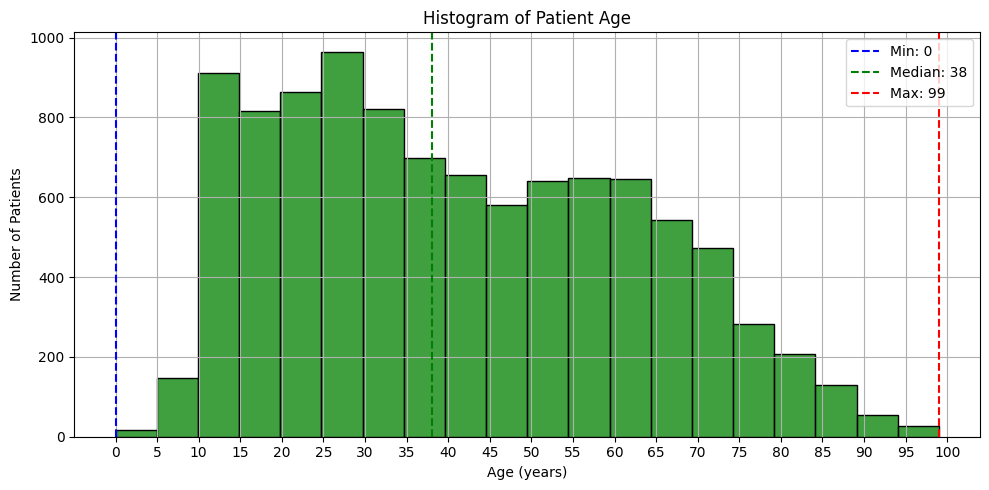

In [91]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean birthdate
eda_data = merged_data[pd.notnull(merged_data['BIRTHDATE'])]

# Step 2: Calculate AGE with deathdate fallback
today = pd.Timestamp.today()
eda_data['AGE'] = eda_data.apply(
    lambda row: ((row['DEATHDATE'] - row['BIRTHDATE']).days // 365)
    if pd.notnull(row['DEATHDATE']) and row['DEATHDATE'] > row['BIRTHDATE']
    else ((today - row['BIRTHDATE']).days // 365),
    axis=1
)
X=len(eda_data)
print(X)
# Step 3: Remove invalid ages
eda_data = eda_data[eda_data['AGE'] >= 0]
Y=len(eda_data)
print(Y)
# Step 4: Summary stats
average_age = eda_data['AGE'].mean()
min_age = eda_data['AGE'].min()
median_age = eda_data['AGE'].median()
max_age = eda_data['AGE'].max()

# Step 5: Print summary
print("Age Statistics after data cleaning:")
print(f"Average Age: {average_age:.2f} years")
print(f"Youngest Age: {min_age:.0f} years")
print(f"Median Age: {median_age:.0f} years")
print(f"Oldest Age: {max_age:.0f} years")

# Step 6: Histogram for AGE
plt.figure(figsize=(10, 5))
sns.histplot(eda_data['AGE'], bins=20, kde=False, color='green', edgecolor='black')

# Add vertical lines for stats
plt.axvline(min_age, color='blue', linestyle='--', label=f'Min: {min_age:.0f}')
plt.axvline(median_age, color='green', linestyle='--', label=f'Median: {median_age:.0f}')
plt.axvline(max_age, color='red', linestyle='--', label=f'Max: {max_age:.0f}')

plt.xticks(range(0, int(max_age) + 5, 5))

plt.title("Histogram of Patient Age")
plt.xlabel("Age (years)")
plt.ylabel("Number of Patients")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [99]:
# Show patients with negative AGE
negative_age_examples = merged_data[merged_data['AGE'] < 0]

# Print number of such rows
print(f"🚨 Number of patients with negative AGE: {negative_age_examples.shape[0]}")

# Show a few rows with important columns
print("🧾 Example rows with negative AGE:")
print(negative_age_examples[['PATIENT', 'BIRTHDATE', 'DEATHDATE', 'AGE','PROCEDURE_NOTES', 'CONDITION_NOTES' ]].head(10))


🚨 Number of patients with negative AGE: 0
🧾 Example rows with negative AGE:
Empty DataFrame
Columns: [PATIENT, BIRTHDATE, DEATHDATE, AGE, PROCEDURE_NOTES, CONDITION_NOTES]
Index: []


Average BMI: 26.31
Lowest BMI: 9.48
Highest BMI: 59.52


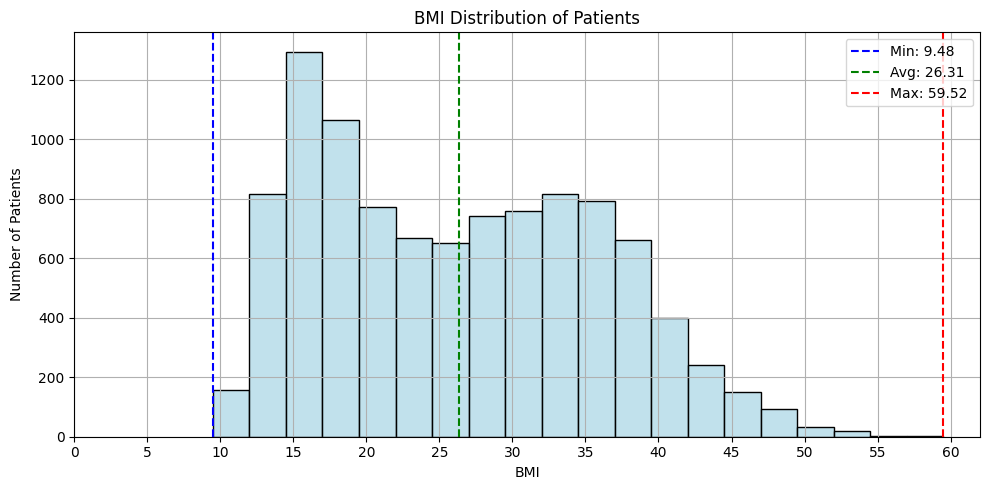

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate BMI (already done in your code)
eda_data['BMI'] = eda_data['Weight_kg'] / ((eda_data['Height_cm'] / 100) ** 2)

# Clean BMI values
eda_data = eda_data[eda_data['BMI'].notnull() & (eda_data['BMI'] > 0)]

# Stats
average_bmi = eda_data['BMI'].mean()
min_bmi = eda_data['BMI'].min()
max_bmi = eda_data['BMI'].max()

# Print stats
print(f"Average BMI: {average_bmi:.2f}")
print(f"Lowest BMI: {min_bmi:.2f}")
print(f"Highest BMI: {max_bmi:.2f}")

# Plot
plt.figure(figsize=(10, 5))
sns.histplot(eda_data['BMI'], bins=20, kde=False, color='lightblue', edgecolor='black')  # Gold color

# Add vertical lines
plt.axvline(min_bmi, color='blue', linestyle='--', label=f'Min: {min_bmi:.2f}')
plt.axvline(average_bmi, color='green', linestyle='--', label=f'Avg: {average_bmi:.2f}')
plt.axvline(max_bmi, color='red', linestyle='--', label=f'Max: {max_bmi:.2f}')

plt.title("BMI Distribution of Patients")
plt.xlabel("BMI")
plt.ylabel("Number of Patients")
plt.xticks(range(0, int(max_bmi) + 5, 5))
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [101]:
# Remove rows where GENDER is 'french'
eda_data = eda_data[eda_data['GENDER'].str.lower() != 'french']

# Confirm cleanup
print("✅ 'french' entry removed from GENDER column:")
print(eda_data['GENDER'].value_counts())


✅ 'french' entry removed from GENDER column:
GENDER
F                   5212
M                   4918
french_canadian        1
english                1
1961-03-07polish       1
Name: count, dtype: int64


In [103]:
# Distribution stats
gender_dist = eda_data['GENDER'].value_counts()
marital_dist = eda_data['MARITAL'].value_counts()
race_dist = eda_data['RACE'].value_counts()
ethnicity_dist = eda_data['ETHNICITY'].value_counts()
city_dist = eda_data['BP_CITY'].value_counts().head(5)
state_dist = eda_data['STATE'].value_counts()
zip_dist = eda_data['ZIP'].value_counts().head(5)

# Print nicely
print("✅ Part 3: Distribution stats")
print("\nGender Distribution:\n", gender_dist.to_string())
print("\nMarital Status Distribution:\n", marital_dist.to_string())
print("\nRace Distribution:\n", race_dist.to_string())
print("\nEthnicity Distribution:\n", ethnicity_dist.to_string())
print("\nTop 5 Cities:\n", city_dist.to_string())
print("\nTop 5 ZIP Codes:\n", zip_dist.to_string())

✅ Part 3: Distribution stats

Gender Distribution:
 GENDER
F                   5212
M                   4918
french_canadian        1
english                1
1961-03-07polish       1

Marital Status Distribution:
 MARITAL
No Data    4515
M          4505
S          1112
3/13/45       1

Race Distribution:
 RACE
white       7970
hispanic     939
black        620
asian        601
M              2
S              1

Ethnicity Distribution:
 ETHNICITY
irish               2145
italian             1327
english             1011
french               727
puerto_rican         679
german               579
polish               465
portuguese           448
american             400
chinese              396
french_canadian      319
dominican            250
african              249
asian_indian         205
swedish              189
scottish             181
russian              179
mexican              136
central_american     124
west_indian          121
white                  3

Top 5 Cities:
 BP_CITY


In [104]:
# Clean GENDER column
eda_data['GENDER'] = eda_data['GENDER'].str.upper().str.strip()
eda_data = eda_data[eda_data['GENDER'].isin(['M', 'F'])]

# Clean MARITAL column
valid_marital_status = ['S', 'M', 'D', 'W', 'NO DATA']
eda_data['MARITAL'] = eda_data['MARITAL'].str.upper().str.strip()
eda_data = eda_data[eda_data['MARITAL'].isin(valid_marital_status)]

# Clean RACE column
valid_races = ['white', 'black', 'asian', 'hispanic', 'native', 'other']
eda_data['RACE'] = eda_data['RACE'].str.lower().str.strip()
eda_data = eda_data[eda_data['RACE'].isin(valid_races)]

# (Optional) Clean ZIP column to keep only numeric entries
eda_data = eda_data[eda_data['ZIP'].str.isnumeric()]

# Confirm cleanup
print("✅ Cleaned data summary:")
print("Gender Distribution:\n", eda_data['GENDER'].value_counts())
print("Marital Status Distribution:\n", eda_data['MARITAL'].value_counts())
print("Race Distribution:\n", eda_data['RACE'].value_counts())

✅ Cleaned data summary:
Gender Distribution:
 GENDER
F    5212
M    4917
Name: count, dtype: int64
Marital Status Distribution:
 MARITAL
NO DATA    4513
M          4504
S          1112
Name: count, dtype: int64
Race Distribution:
 RACE
white       7969
hispanic     939
black        620
asian        601
Name: count, dtype: int64


✅ Part 3: Distribution stats

Gender Distribution:
 GENDER
F    5212
M    4917

Marital Status Distribution:
 MARITAL
NO DATA    4513
M          4504
S          1112

Race Distribution:
 RACE
white       7969
hispanic     939
black        620
asian        601

Ethnicity Distribution:
 ETHNICITY
irish               2145
italian             1326
english             1011
french               727
puerto_rican         679
german               579
polish               465
portuguese           448
american             400
chinese              396
french_canadian      319
dominican            250
african              249
asian_indian         205
swedish              189
scottish             181
russian              179
mexican              136
central_american     124
west_indian          121

Top 5 Cities:
 BP_CITY
Boston         953
Worcester      284
Springfield    227
Lowell         160
Cambridge      160

Top 5 ZIP Codes:
 ZIP
02148    123
02151    106
01844     98
02630     81
01915     

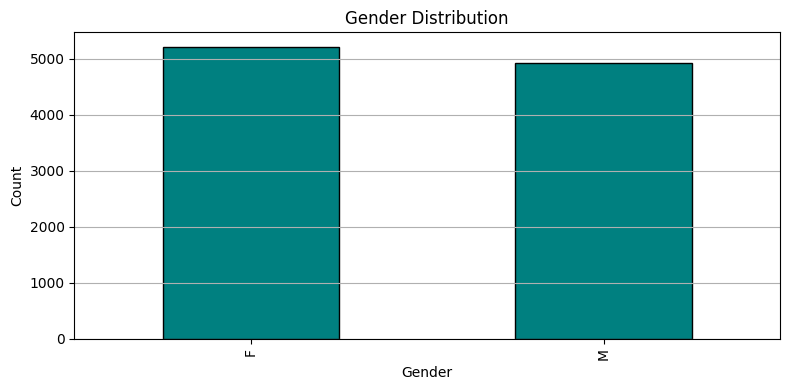

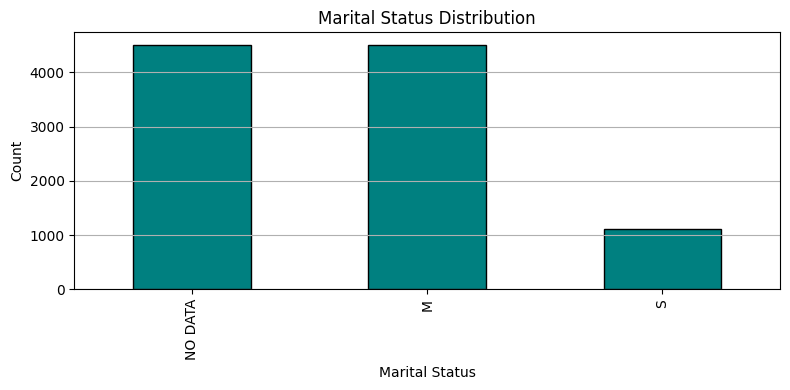

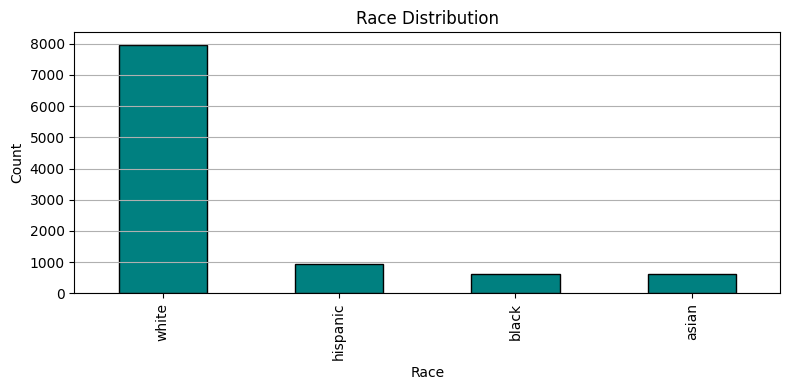

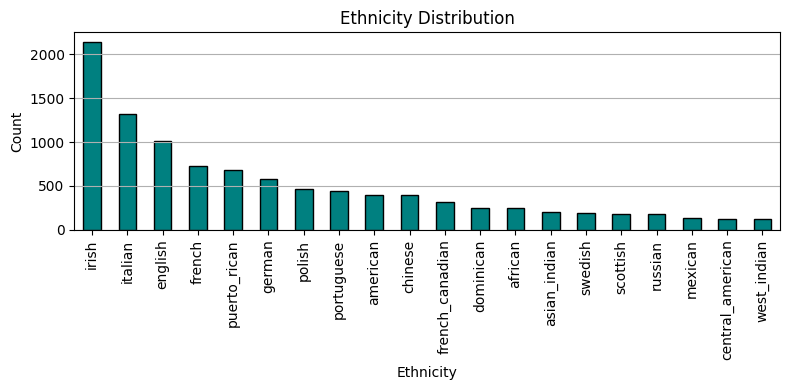

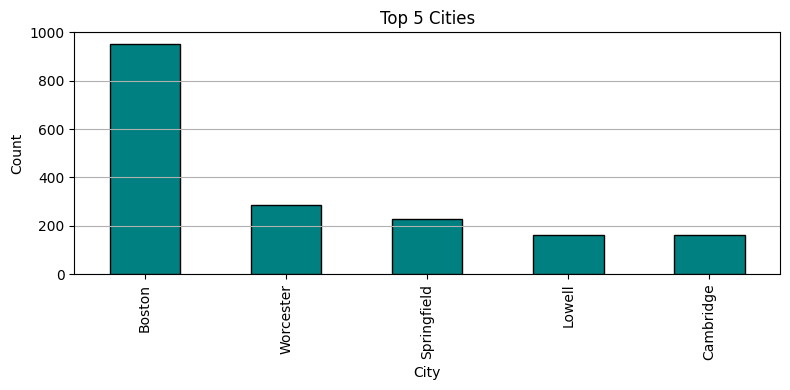

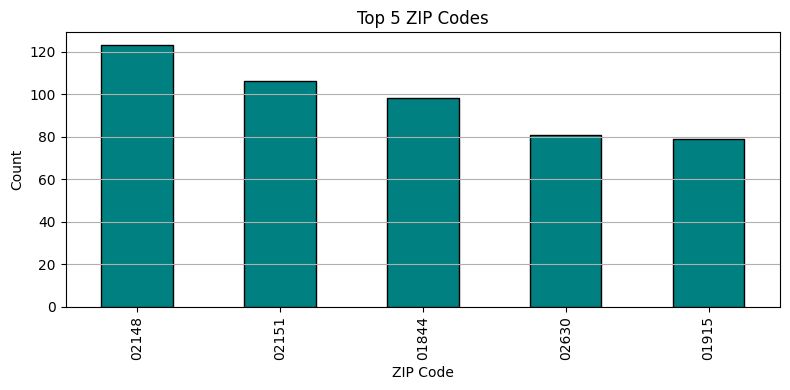

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Distribution stats
gender_dist = eda_data['GENDER'].value_counts()
marital_dist = eda_data['MARITAL'].value_counts()
race_dist = eda_data['RACE'].value_counts()
ethnicity_dist = eda_data['ETHNICITY'].value_counts()
city_dist = eda_data['BP_CITY'].value_counts().head(5)
state_dist = eda_data['STATE'].value_counts()
zip_dist = eda_data['ZIP'].value_counts().head(5)

# Print nicely
print("✅ Part 3: Distribution stats")
print("\nGender Distribution:\n", gender_dist.to_string())
print("\nMarital Status Distribution:\n", marital_dist.to_string())
print("\nRace Distribution:\n", race_dist.to_string())
print("\nEthnicity Distribution:\n", ethnicity_dist.to_string())
print("\nTop 5 Cities:\n", city_dist.to_string())
print("\nTop 5 ZIP Codes:\n", zip_dist.to_string())

# Helper plot function
def plot_bar(data, title, xlabel):
    plt.figure(figsize=(8, 4))
    data.plot(kind='bar', color='teal', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Plotting each
plot_bar(gender_dist, "Gender Distribution", "Gender")
plot_bar(marital_dist, "Marital Status Distribution", "Marital Status")
plot_bar(race_dist, "Race Distribution", "Race")
plot_bar(ethnicity_dist, "Ethnicity Distribution", "Ethnicity")
plot_bar(city_dist, "Top 5 Cities", "City")
plot_bar(zip_dist, "Top 5 ZIP Codes", "ZIP Code")


🧾 Note Statistics:
Total Patient: 10129
Unique Patient: 10129
Total Allergy: 10129
Unique Allergy: 1994
Total Condition: 10129
Unique Condition: 8474
Total Medication: 10129
Unique Medication: 6410
Total Procedure: 10129
Unique Procedure: 5712
Total Encounter: 10129
Unique Encounter: 8843

👥 Notes per Patient (sample):
                                PATIENT  CONDITION_NOTES  MEDICATION_NOTES  \
0  00039a3b-c1f8-459f-9a3b-c8838068f93b                1                 1   
1  00054564-4617-4a2f-9698-d3d87a46195f                1                 1   
2  0006b2a0-f823-460f-9682-9a52fa7aec34                1                 1   
3  000b6b3d-6be8-42b5-91af-10115c551e26                1                 1   
4  000d4935-211d-412c-b9f3-ef3fd0603d3c                1                 1   

   PROCEDURE_NOTES  ENCOUNTER_NOTES  
0                1                1  
1                1                1  
2                1                1  
3                1                1  
4                1  

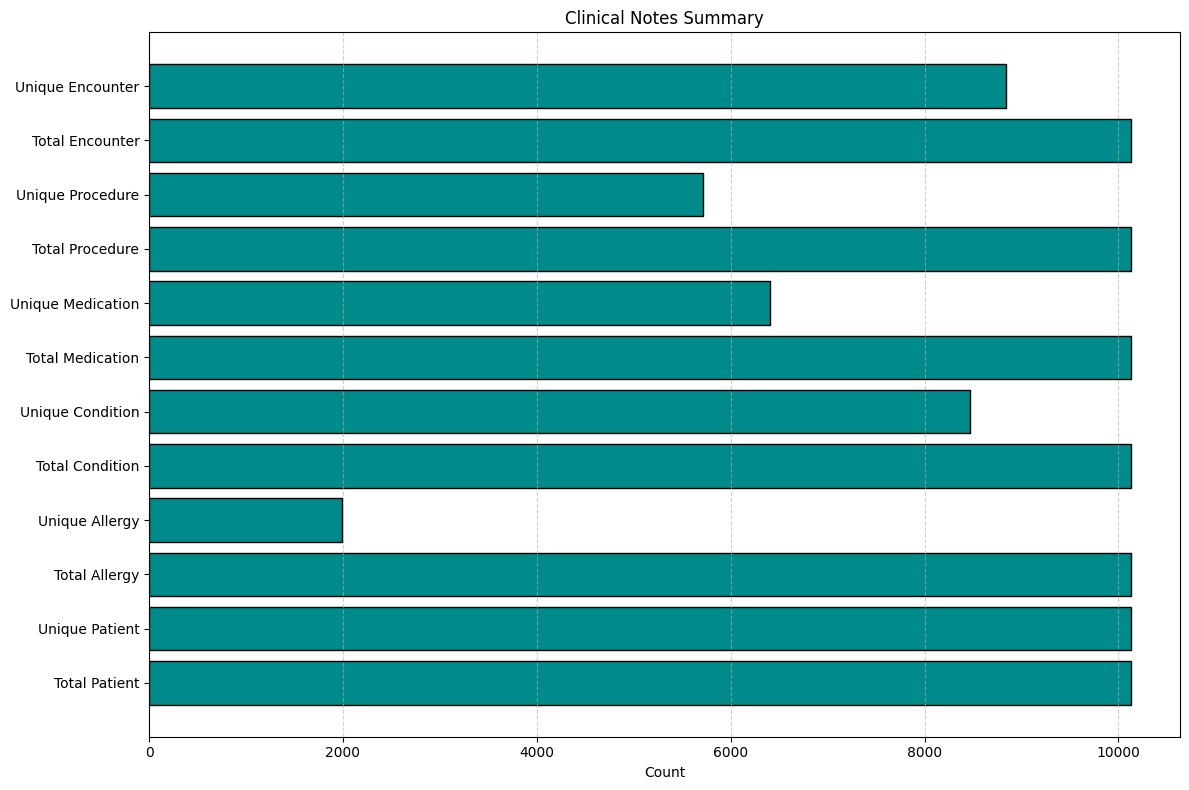

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Select needed columns
note_cols = ['PATIENT','ALLERGY_NOTES', 'CONDITION_NOTES', 'MEDICATION_NOTES', 'PROCEDURE_NOTES', 'ENCOUNTER_NOTES']
note_data = eda_data[note_cols].copy()

# Step 2: Explode and count total/unique entries for each column
def get_note_stats(col):
    exploded = note_data[col].dropna().str.split(';').explode().str.strip()
    total = exploded.count()
    unique = exploded.nunique()
    return total, unique

# Step 3: Store total/unique counts
note_stats = {}
for col in ['PATIENT', 'ALLERGY_NOTES', 'CONDITION_NOTES', 'MEDICATION_NOTES', 'PROCEDURE_NOTES', 'ENCOUNTER_NOTES']:
    total, unique = get_note_stats(col)
    pretty_name = col.replace('_NOTES', '').title()
    note_stats[f"Total {pretty_name}"] = total
    note_stats[f"Unique {pretty_name}"] = unique

# Step 4: Print the stats
print("🧾 Note Statistics:")
for k, v in note_stats.items():
    print(f"{k}: {v}")

# Step 5: Group by patient to count number of notes per patient
grouped = note_data.copy()
for col in ['CONDITION_NOTES', 'MEDICATION_NOTES', 'PROCEDURE_NOTES', 'ENCOUNTER_NOTES']:
    grouped[col] = grouped[col].fillna('').str.split(';').apply(lambda x: len([i for i in x if i.strip() != '']))

grouped_stats = grouped.groupby("PATIENT")[['CONDITION_NOTES', 'MEDICATION_NOTES', 'PROCEDURE_NOTES', 'ENCOUNTER_NOTES']].sum().reset_index()
print("\n👥 Notes per Patient (sample):")
print(grouped_stats.head())

# Step 6: Plot total note counts
note_df = pd.DataFrame(list(note_stats.items()), columns=["Category", "Count"])
plt.figure(figsize=(12, 8))
plt.barh(note_df["Category"], note_df["Count"], color='darkcyan', edgecolor='black')
plt.xlabel("Count")
plt.title("Clinical Notes Summary")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


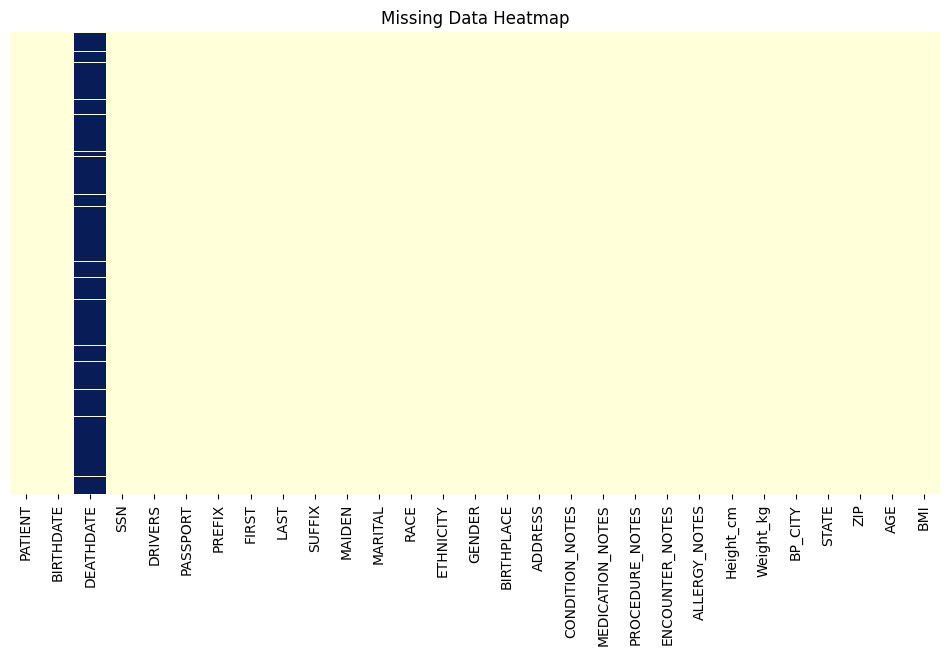

In [111]:
#Missing Data Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(eda_data.isnull(), cbar=False, cmap='YlGnBu', yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


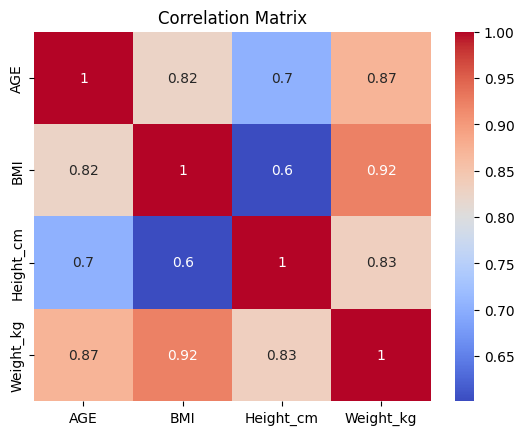

In [112]:
#Correlations Between Numeric Fields
numeric_cols = ['AGE', 'BMI', 'Height_cm', 'Weight_kg']
sns.heatmap(eda_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

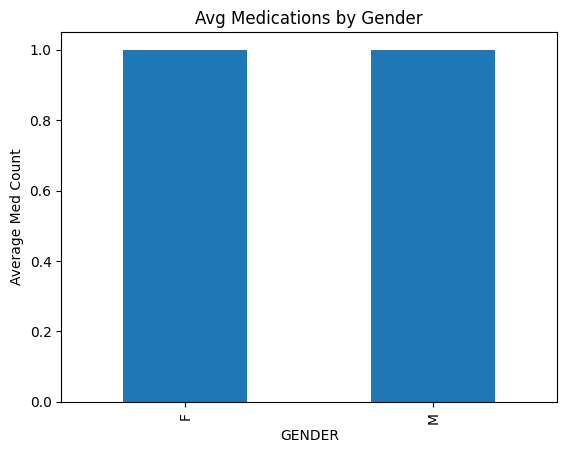

In [113]:
#E.g., Average number of conditions or medications per gender or race


eda_data['MED_COUNT'] = eda_data['MEDICATION_NOTES'].dropna().str.split(';').apply(lambda x: len([i for i in x if i.strip() != '']))
eda_data.groupby('GENDER')['MED_COUNT'].mean().plot(kind='bar', title="Avg Medications by Gender")
plt.ylabel("Average Med Count")
plt.show()


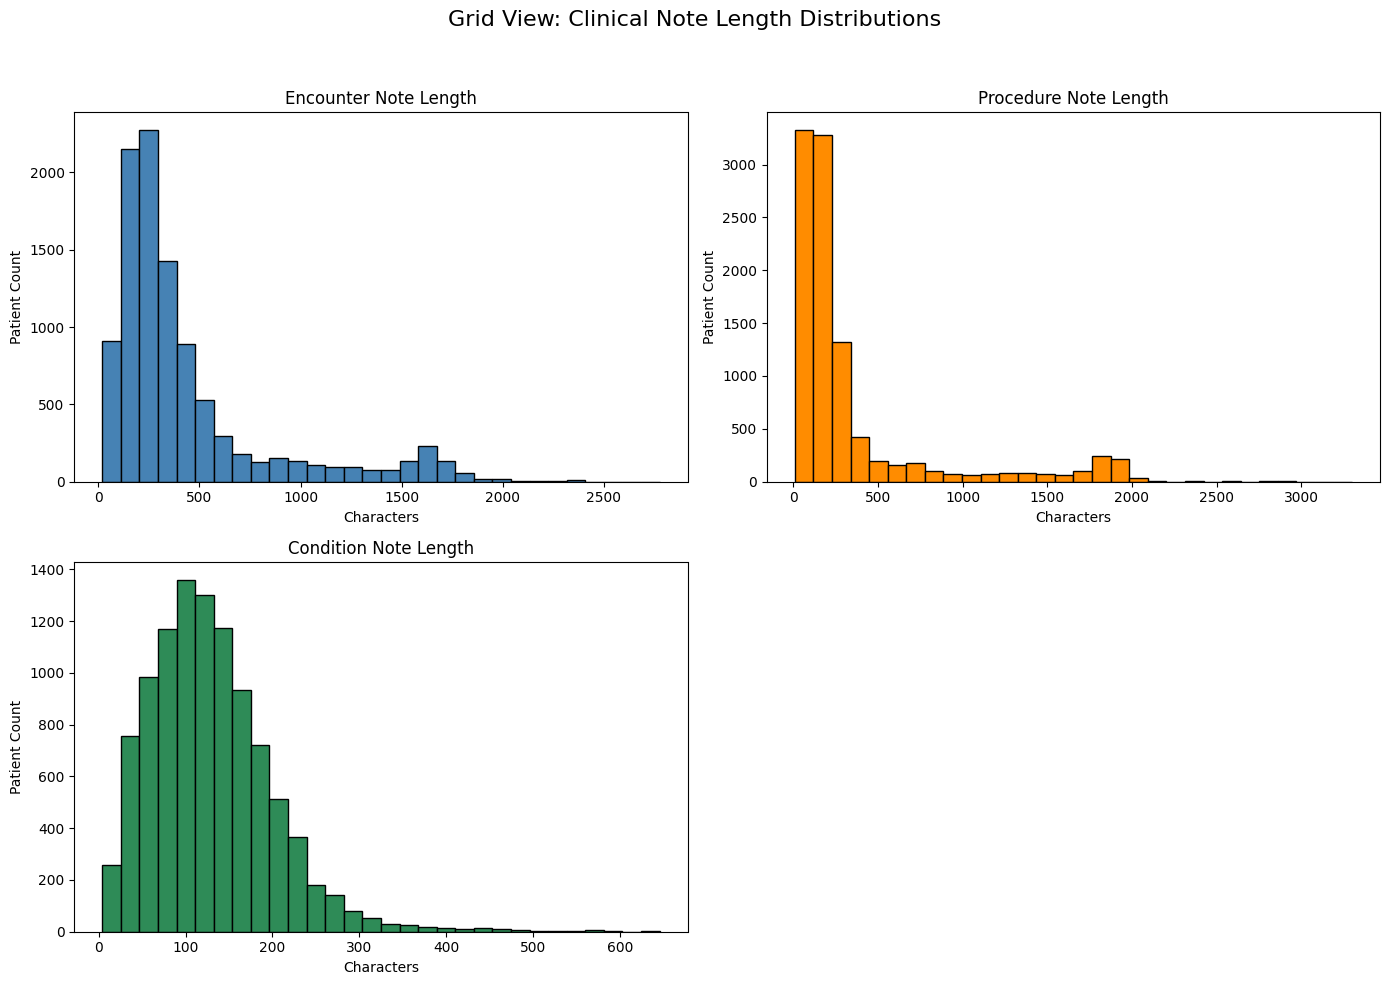

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Compute note lengths
eda_data['ENCOUNTER_LENGTH'] = eda_data['ENCOUNTER_NOTES'].fillna('').apply(len)
eda_data['PROCEDURE_LENGTH'] = eda_data['PROCEDURE_NOTES'].fillna('').apply(len)
eda_data['CONDITION_LENGTH'] = eda_data['CONDITION_NOTES'].fillna('').apply(len)

# Step 2: Create a 2x2 grid of plots (only using 3 slots for now)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot 1: Encounter Notes
axes[0].hist(eda_data['ENCOUNTER_LENGTH'], bins=30, color='steelblue', edgecolor='black')
axes[0].set_title("Encounter Note Length")
axes[0].set_xlabel("Characters")
axes[0].set_ylabel("Patient Count")

# Plot 2: Procedure Notes
axes[1].hist(eda_data['PROCEDURE_LENGTH'], bins=30, color='darkorange', edgecolor='black')
axes[1].set_title("Procedure Note Length")
axes[1].set_xlabel("Characters")
axes[1].set_ylabel("Patient Count")

# Plot 3: Condition Notes
axes[2].hist(eda_data['CONDITION_LENGTH'], bins=30, color='seagreen', edgecolor='black')
axes[2].set_title("Condition Note Length")
axes[2].set_xlabel("Characters")
axes[2].set_ylabel("Patient Count")

# Hide 4th subplot (not used)
axes[3].axis('off')

# Adjust layout
plt.suptitle("Grid View: Clinical Note Length Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
